<a href="https://colab.research.google.com/github/bayu1707/DAA/blob/main/DAA%20PERTEMUAN%207.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
#page 9
# Algoritma Dynamic :
#Fibbonaci dengan while
nterms = int(input("How many terms? "))
n1, n2 = 0, 1
count = 0

if nterms <= 0:
  print("Please enter a positive integer")
elif nterms == 1:
  print("Fibonacci sequence up to ",nterms,":")
  print(n1)
else:
  print("Fibonacci sequence")
  while count < nterms:
    print(n1)
    nth = n1+n2
    #update nilai
    n1 = n2
    n2 = nth
    count += 1

How many terms? 10
Fibonacci sequence
0
1
1
2
3
5
8
13
21
34


In [3]:
#page 10
# Deret Fibonacci dengan Rekursi

def recur_fibo(n):
  if n <= 1:
    return n
  else:
    return(recur_fibo(n-1) + recur_fibo(n-2))

nterms = 20

# cek apakah nilai nterms valid
if nterms <= 0:
  print("Please enter a positive integer")
else:
  print("Fibonacci sequence: ")
  for i in range(nterms):
    print(recur_fibo(i))

Fibonacci sequence: 
0
1
1
2
3
5
8
13
21
34
55
89
144
233
377
610
987
1597
2584
4181


In [4]:
#page 24
import matplotlib
import matplotlib.pyplot as plt
import random
import time
import itertools

In [5]:
#page 26
#try all tours (exact_TSP)
def exact_TSP(cities):
    "Generate all possible tours of the cities and cohoose the shortest one."
    return shortest(alltours(cities))

def shortest(tours):
    "return the tour with the minimum total distance."
    return min(tours, key=total_distance)

In [6]:
#page 27
#Representing Tours
alltours = itertools.permutations # The permutation function is already defined in the itertools module

cities = {1, 2, 3}

list(alltours(cities))

[(1, 2, 3), (1, 3, 2), (2, 1, 3), (2, 3, 1), (3, 1, 2), (3, 2, 1)]

In [7]:
#page 28
#Representing Cities and Distance
def total_distance(tour):
  "the total_distance between each pair of cpnsecutive cities in the tour"
  return sum(distance(tour[i], tour[i-1]) for i in range(len(tour)))

In [8]:
#page 29
City = complex #Constructorfor new cities, e-g. City(300,400)

def distance(A, B):
  "The distance between two points."
  return abs(A - B)

In [9]:
#page 30
A = City(300, 0)
B = City(0, 400)
distance(A, B)

500.0

In [10]:
#page 31
def Cities(n):
  "Make a set of n cities, each with random coordinates."
  return set(City(random.randrange(10, 890), random.randrange(10, 500)) for c in range(n))

# Let's make some standard sets ofcities of various sizes
# We'll set the random seed so that these sets are the sam every time we run this notebook.
random.seed('seed')
cities8, cities10, cities100, cities1000 = Cities(8), Cities(10), Cities(100), Cities(1000)
cities8

{(151+40j),
 (252+492j),
 (365+156j),
 (506+32j),
 (551+276j),
 (632+185j),
 (748+465j),
 (753+367j)}

In [11]:
#page 32
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

((632+185j), (551+276j), (753+367j), (748+465j), (252+492j), (151+40j), (365+156j), (506+32j))
2030.7779956859808


In [12]:
#page 33
#Try All Non-Redundant Tours
def alltours(cities):
  "Return a list of tours, each a permutation of cities, but each one starting with the same city."
  start = first(cities)
  return [[start] + list(tour)
          for tour in itertools.permutations(cities - {start})]

def first(collection):
  "Start iterating over collection, and return the first element."
  for x in collection: return x

In [13]:
#page 34
alltours({1, 2, 3})

[[1, 2, 3], [1, 3, 2]]

In [14]:
alltours({1, 2, 3, 4})

[[1, 2, 3, 4],
 [1, 2, 4, 3],
 [1, 3, 2, 4],
 [1, 3, 4, 2],
 [1, 4, 2, 3],
 [1, 4, 3, 2]]

In [15]:
#page 35
tour = exact_TSP(cities8)

print(tour)
print(total_distance(tour))

[(252+492j), (151+40j), (365+156j), (506+32j), (632+185j), (551+276j), (753+367j), (748+465j)]
2030.777995685981


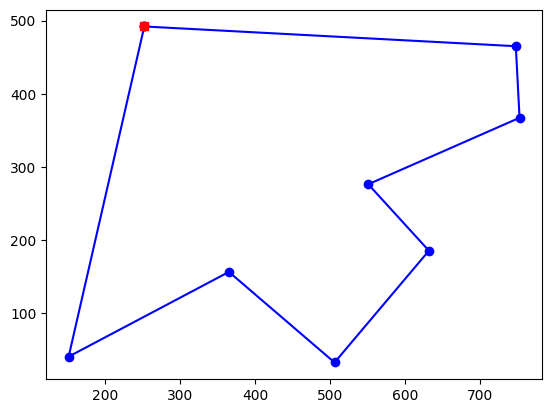

8 city tour; total distance = 2030.8; time = 0.026 secs for exact_TSP


In [16]:
#page 37
# Plotting
import time
def plot_tour(algorithm, cities):
  "Apply a TSP algorithm to cities, and plot the resulting tour."
  # Find the solution and time how long it takes
  t0 = time.time()
  tour = algorithm(cities)
  t1 = time.time()
  # Plot the tour as blue lines between blue circles, and the starting city as a red square.
  plotline(list(tour) + [tour[0]])
  plotline([tour[0]], 'rs')
  plt.show()
  print("{} city tour; total distance = {:.1f}; time = {:.3f} secs for {}".format(
        len(tour), total_distance(tour), t1-t0, algorithm.__name__))


def plotline(points, style='bo-'):
  "Plot a list of points (complex numbers) in the 2-D plane."
  X, Y = XY(points)
  plt.plot(X, Y, style)

def XY(points):
  "Given a list of points, return two lists: X coordinates, and Y coordinates."
  return [p.real for p in points], [p.imag for p in points]

plot_tour(exact_TSP, cities8)

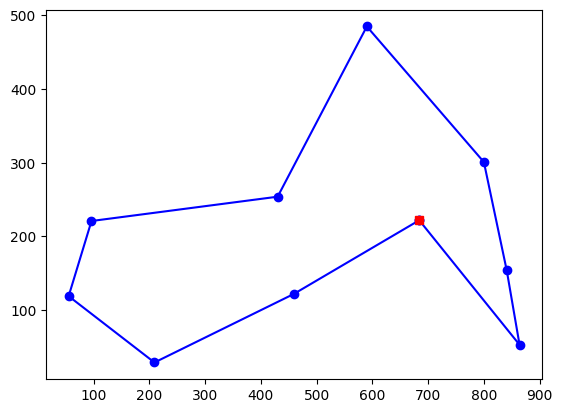

10 city tour; total distance = 2200.2; time = 1.876 secs for exact_TSP


In [17]:
plot_tour(exact_TSP, cities10)

In [18]:
#page 39
# Greedy Nearest Neighbor (greedy_TSP)
def greedy_TSP(cities):
  "At each step, visit the nearest neighbor that is still unvisited."
  start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

def nearest_neighbor(A, cities):
  "Find the city in cities that is nearest to city A."
  return min(cities, key=lambda x: distance(x, A))

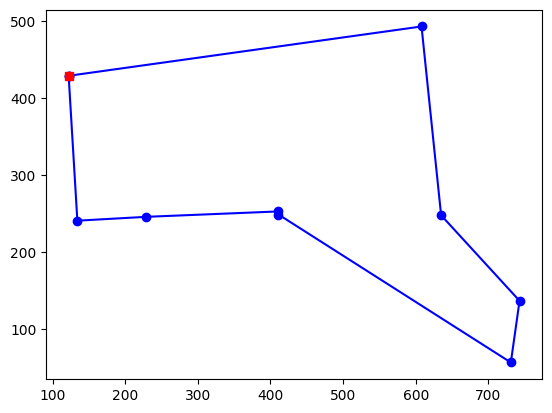

9 city tour; total distance = 1815.3; time = 0.161 secs for exact_TSP


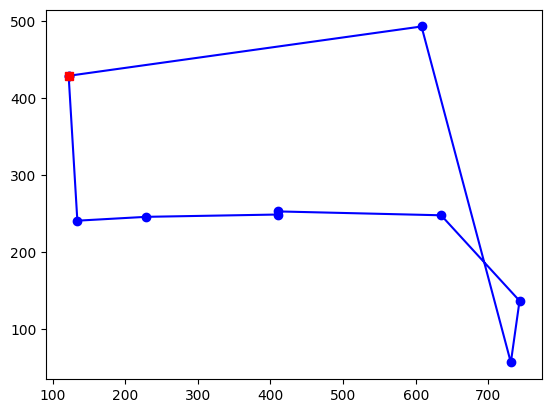

9 city tour; total distance = 1872.6; time = 0.000 secs for greedy_TSP


In [19]:
#page 40
cities = Cities(9)
plot_tour(exact_TSP, cities)
plot_tour(greedy_TSP, cities)

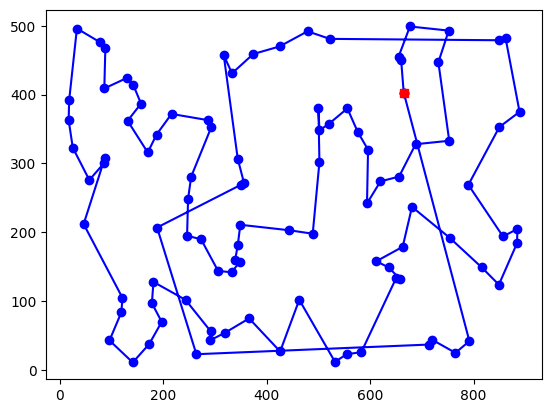

100 city tour; total distance = 6334.8; time = 0.005 secs for greedy_TSP


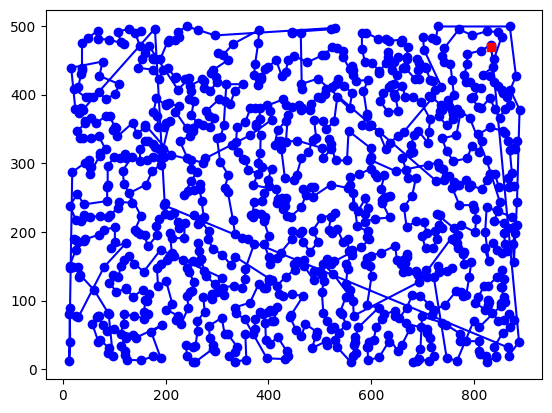

1000 city tour; total distance = 19937.2; time = 0.139 secs for greedy_TSP


In [20]:
#page 41
plot_tour(greedy_TSP, cities100)
plot_tour(greedy_TSP, cities1000)

In [21]:
#page 43
def all_greedy_TSP(cities):
  "Try the greedy algorithm from each of the starting cities; return the shortest tour."
  return shortest(greedy_TSP(cities, start=c) for c in cities)

# We will modify greedy_TSP to take an optional start city; otherwise it is unchanged.

def greedy_TSP(cities, start=None):
  "At each step, visit the nearest neighbor that is still unvisited."
  if start is None: start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

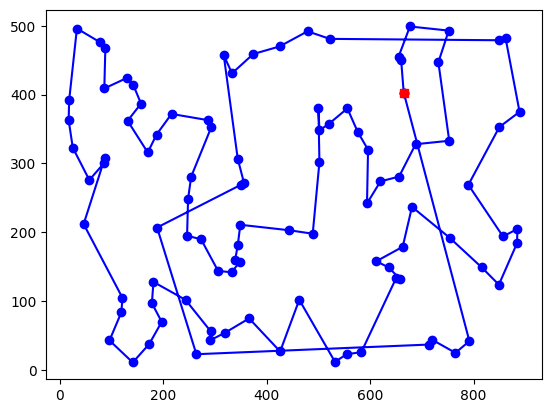

100 city tour; total distance = 6334.8; time = 0.015 secs for greedy_TSP


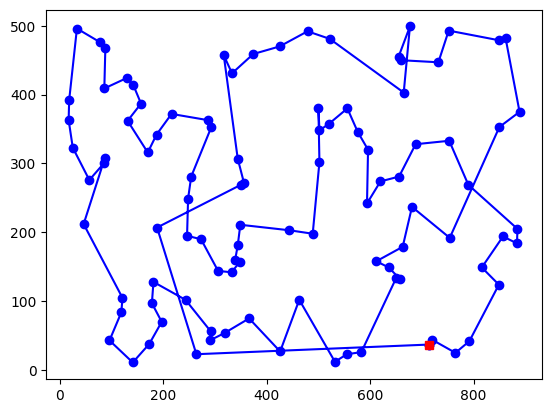

100 city tour; total distance = 6003.0; time = 0.157 secs for all_greedy_TSP


In [22]:
#page 44
plot_tour(greedy_TSP, cities100)
plot_tour(all_greedy_TSP, cities100)

In [23]:
#Algorithm 3: Greedy Nearest Neigbor from All Starting Points (all_greedy_TSP)
def all_greedy_TSP(cities):
  "Try the greedy algorithm from each of the starting cities; return the shortest tour."
  return shortest(greedy_TSP(cities, start=c) for c in cities)

# We will modify greedy_TSP to take an optional start city; otherwise it is unchanged.

def greedy_TSP(cities, start=None):
  "At each step, visit the nearest neighbor that is still unvisited."
  if start is None: start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  while unvisited:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  return tour

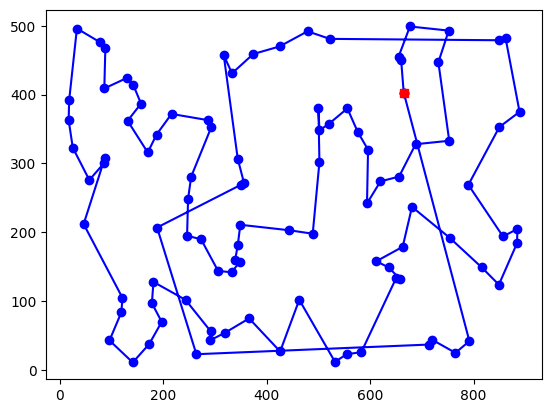

100 city tour; total distance = 6334.8; time = 0.001 secs for greedy_TSP


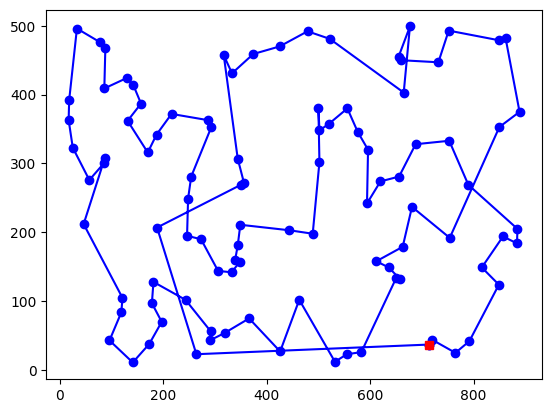

100 city tour; total distance = 6003.0; time = 0.167 secs for all_greedy_TSP


In [24]:
plot_tour(greedy_TSP, cities100)
plot_tour(all_greedy_TSP, cities100)

In [25]:
# Algorithm 4: Greedy Nearest Neighbor with Exact End (greedy_exact_end_TSP)
def greedy_exact_end_TSP(cities, start=None, end_size=8):
  """At each step, visit the nearest neighbor that is still unvisited until
  there are k_end cities left; then choose the best of all possible endings."""
  if start is None: start = first(cities)
  tour = [start]
  unvisited = cities - {start}
  # Use greedy algorithm for all but the last end_size cities
  while len(unvisited) > end_size:
    C = nearest_neighbor(tour[-1], unvisited)
    tour.append(C)
    unvisited.remove(C)
  # Consider all permutations of possible ends to the tour, and chooose the best one.
  # (But to make things faster, omit the middle of the tour.)
  ends = map(list, itertools.permutations(unvisited))
  best = shortest([tour[0], tour[-1]] + end for end in ends)
  return tour + best[2:]